## Task 5 - Sales Prediction Using Machine Learning

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

### Import all the libraries


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pickle
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.drop(columns="Unnamed: 0",inplace=True)

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [15]:
df.corr()["Sales"].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

### Data visualization

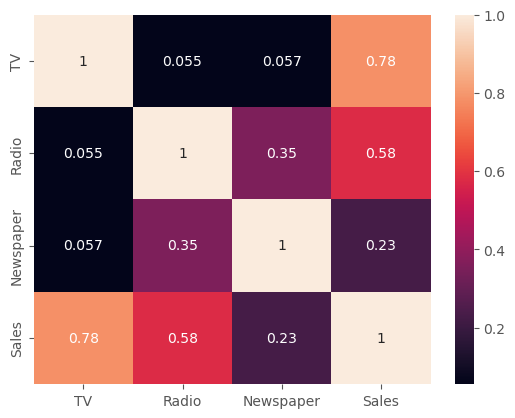

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

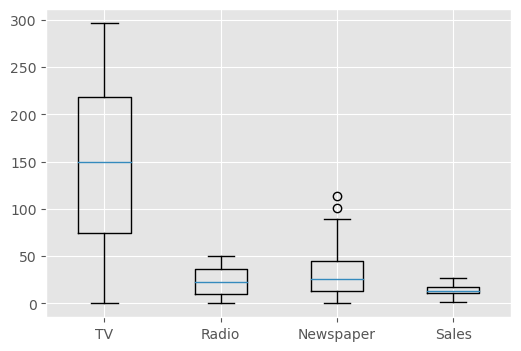

In [21]:
plt.figure(figsize=[6,4])
plt.boxplot(df,data=df,labels=df.columns)
plt.show()

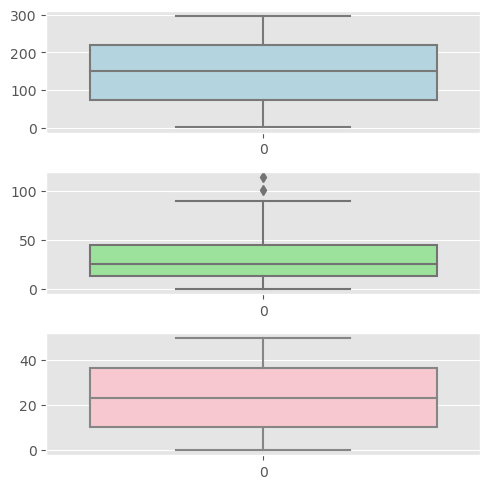

In [29]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0],color = "lightblue")
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1],color = "lightgreen")
plt3 = sns.boxplot(df['Radio'], ax = axs[2],color = "pink")
plt.tight_layout()

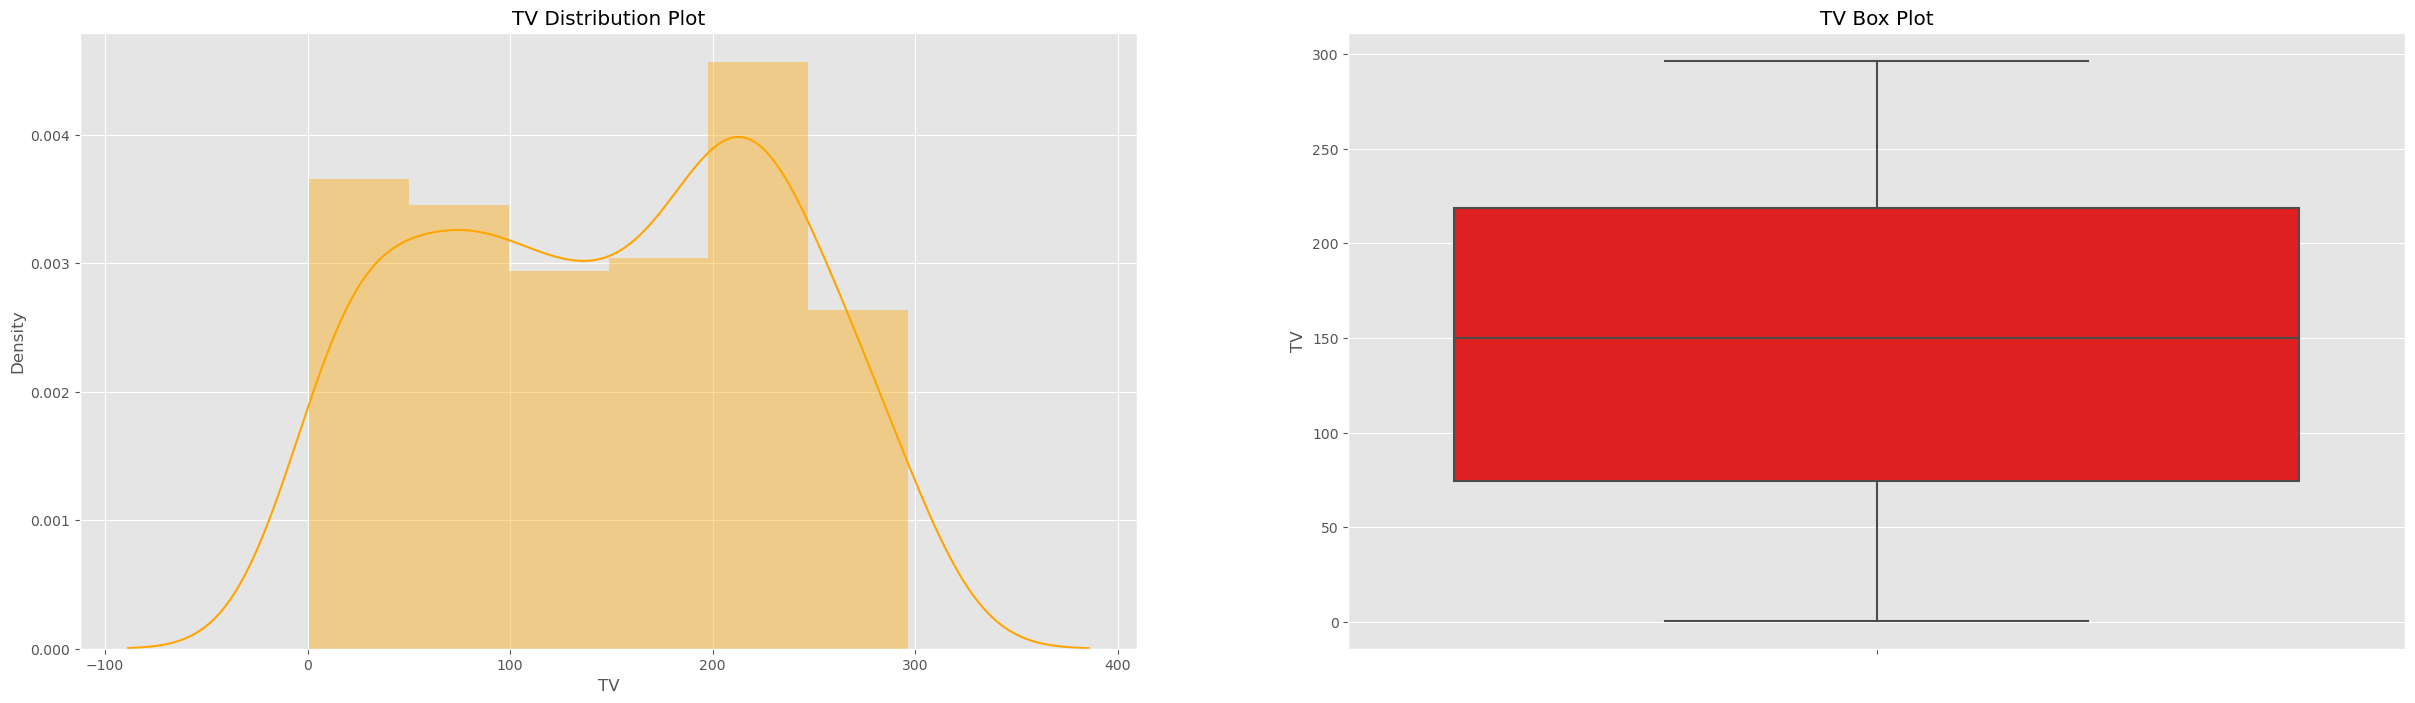

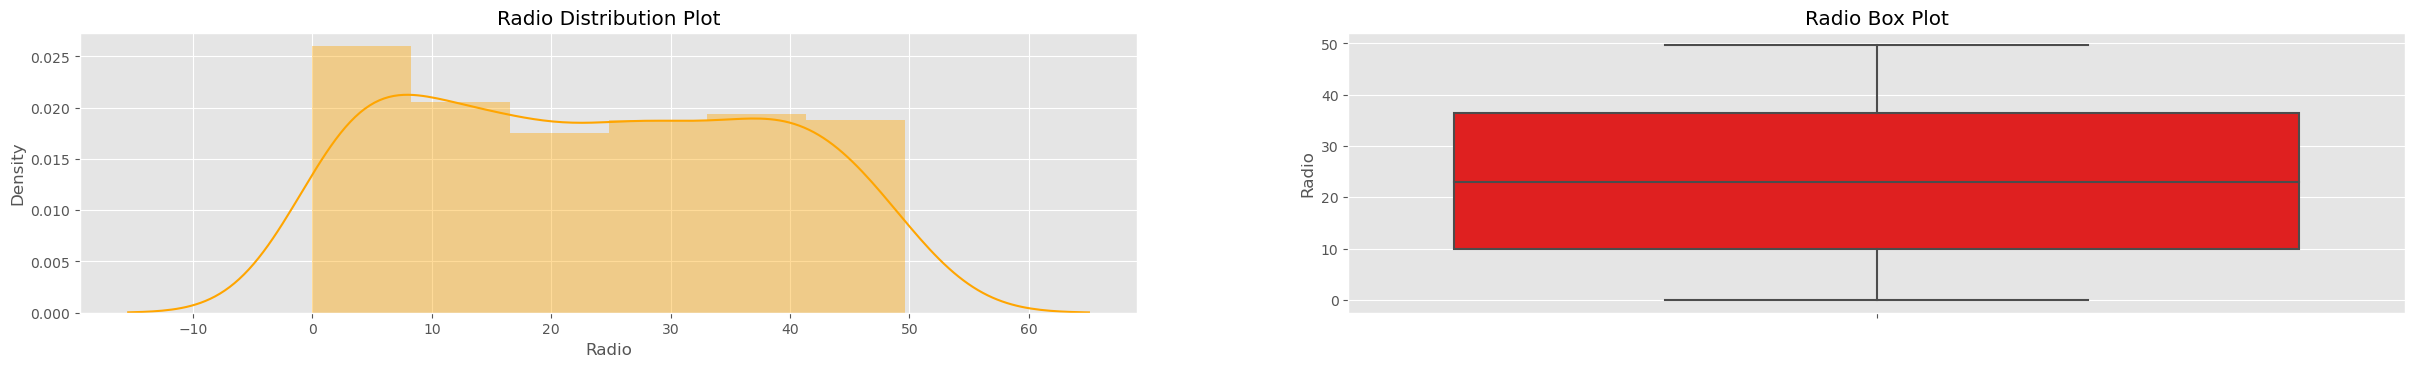

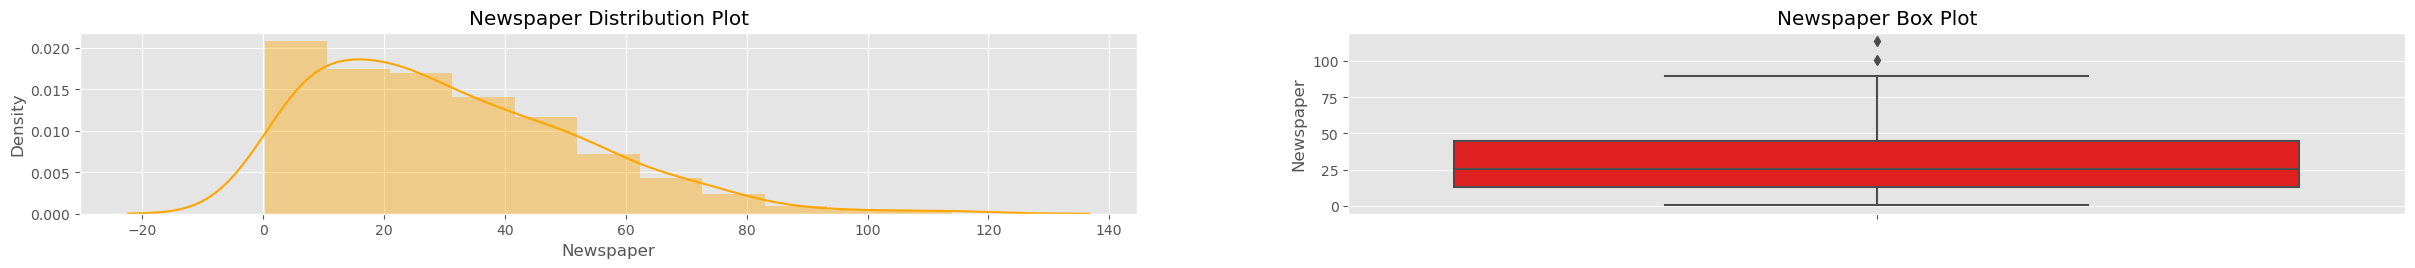

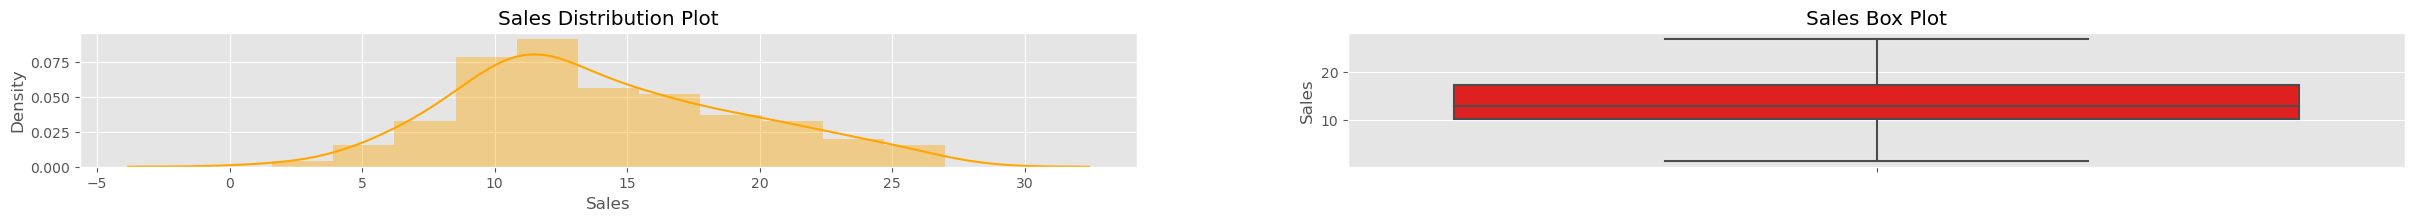

In [36]:
# Let's find the distribution of each of these numerical features and also check for outliers
index = 1
for feature in df.columns:
    plt.figure(figsize=(30,8))
    
    #first plot
    plt.subplot(index,2,1)
    plt.title(feature+" Distribution Plot")
    sns.distplot(df[feature],color = "orange")
    
    # second plot
    plt.subplot(index,2,2)
    plt.title(feature+" Box Plot")
    sns.boxplot(y=df[feature],color = "red")
    
    index+=1
    plt.show()

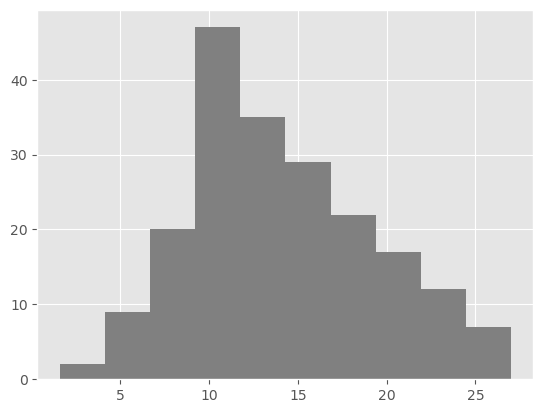

In [37]:
plt.hist(df['Sales'],color = "grey")
plt.show()

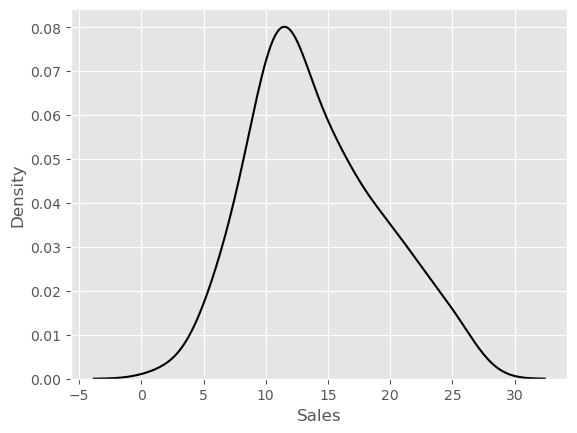

In [39]:
sns.distplot(df['Sales'],hist=False,color = "black")
plt.show()

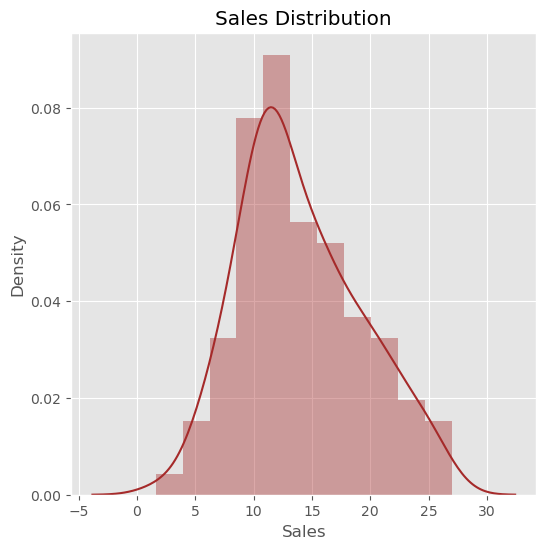

In [40]:
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'],color = "brown")
plt.title('Sales Distribution')
plt.show()

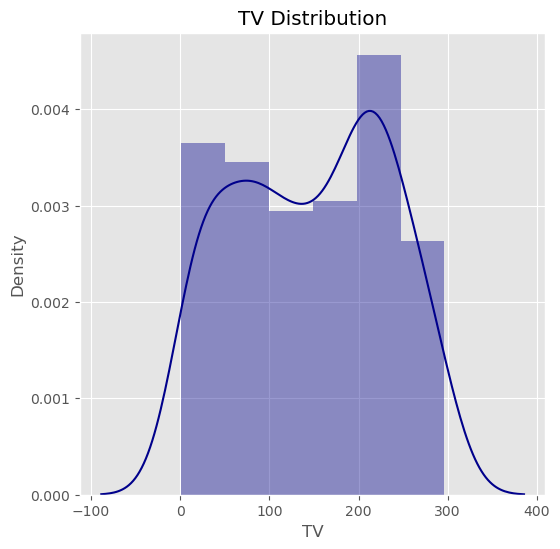

In [45]:
plt.figure(figsize=(6,6))
sns.distplot(df['TV'],color = "darkblue")
plt.title('TV Distribution')
plt.show()

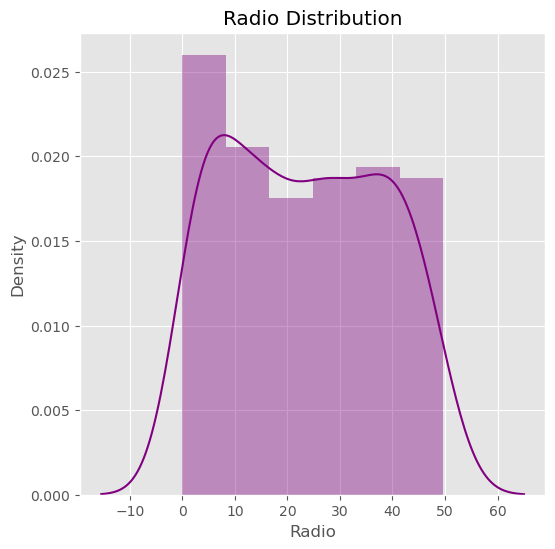

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(df['Radio'],color = "purple")
plt.title('Radio Distribution')
plt.show()

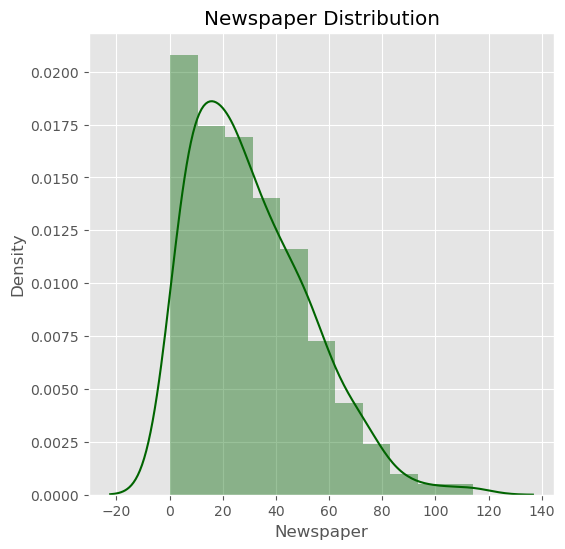

In [46]:
plt.figure(figsize=(6,6))
sns.distplot(df['Newspaper'],color = "darkgreen")
plt.title('Newspaper Distribution')
plt.show()

<Figure size 800x500 with 0 Axes>

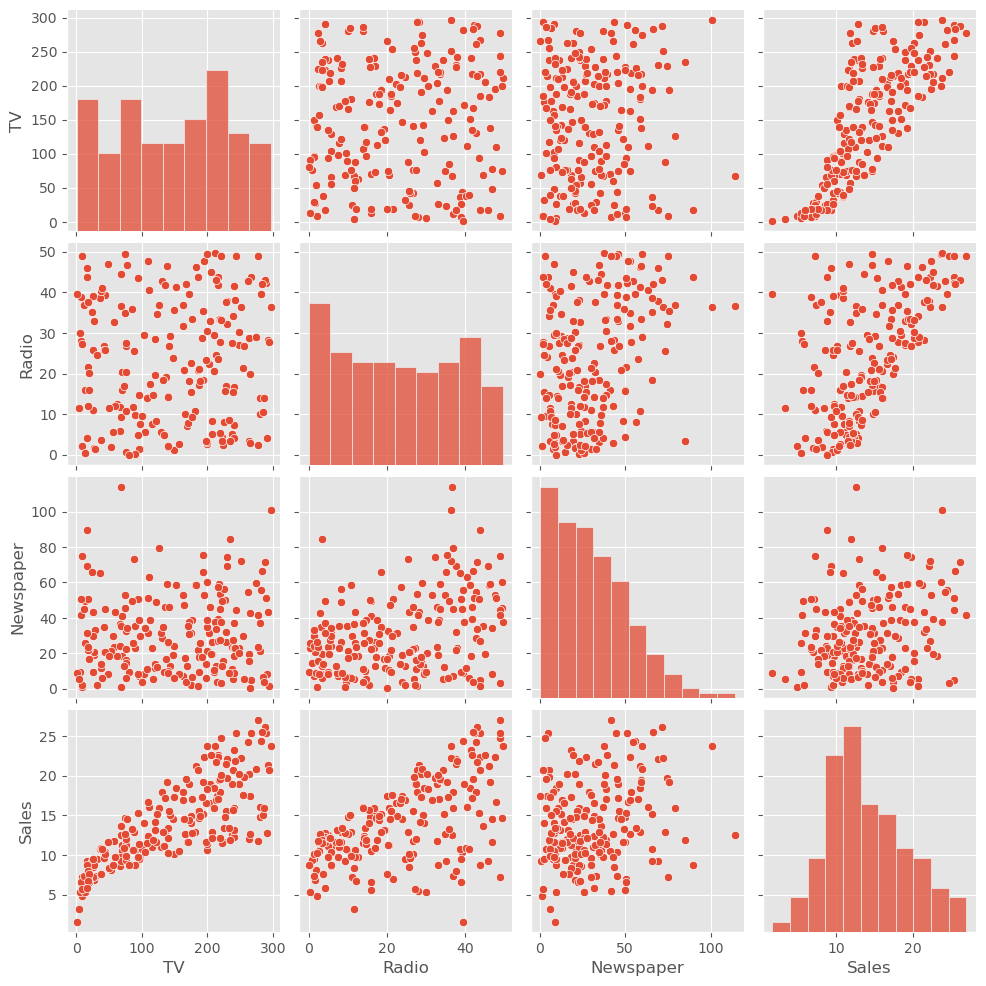

In [51]:
#Pair plot for all features 
plt.figure(figsize=(8,5),dpi=100)
sns.pairplot(df)

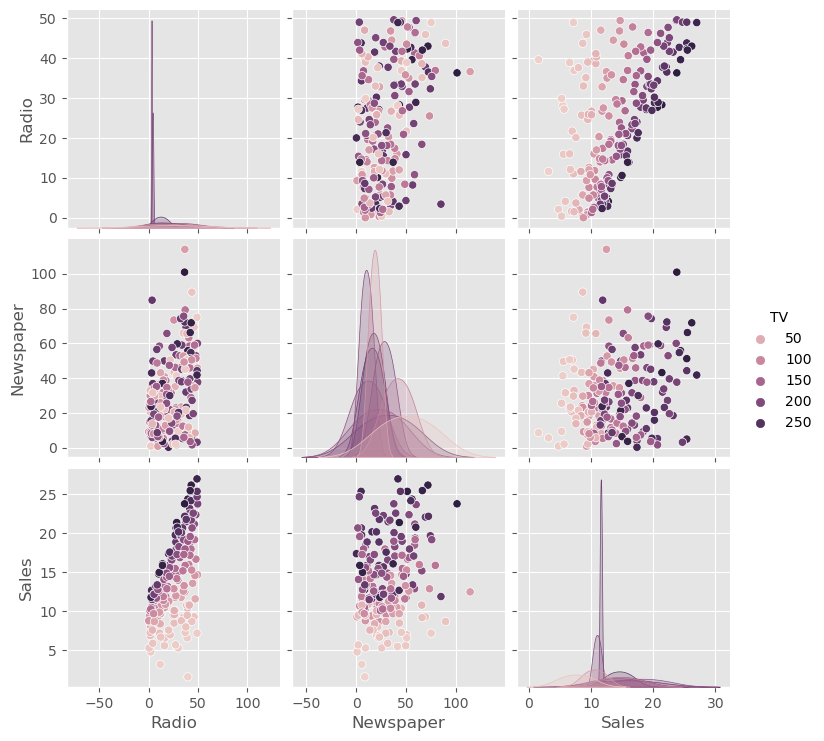

In [52]:
sns.pairplot(df,hue='TV')

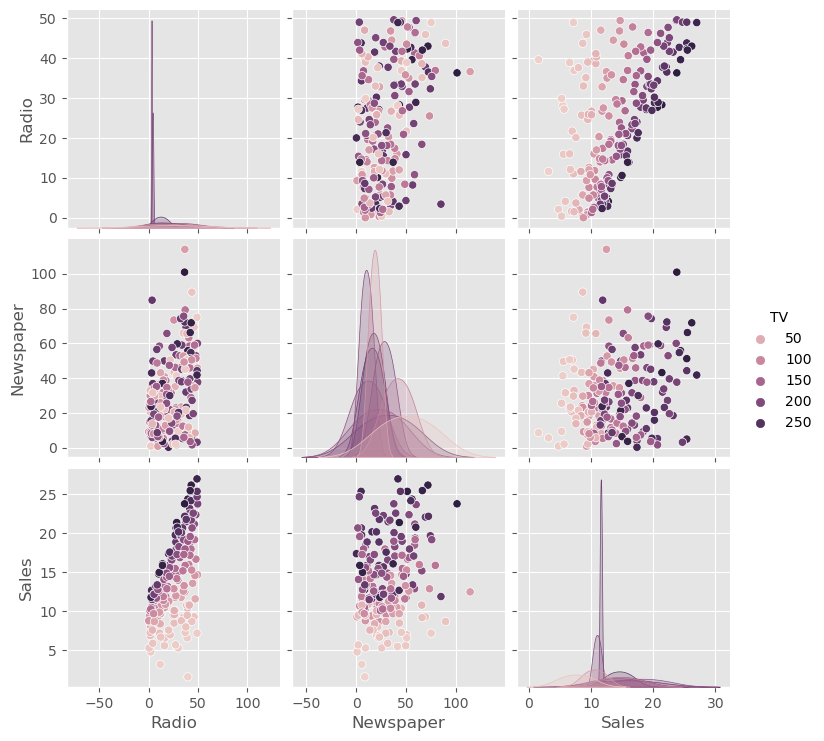

In [53]:
sns.pairplot(df,hue='TV')

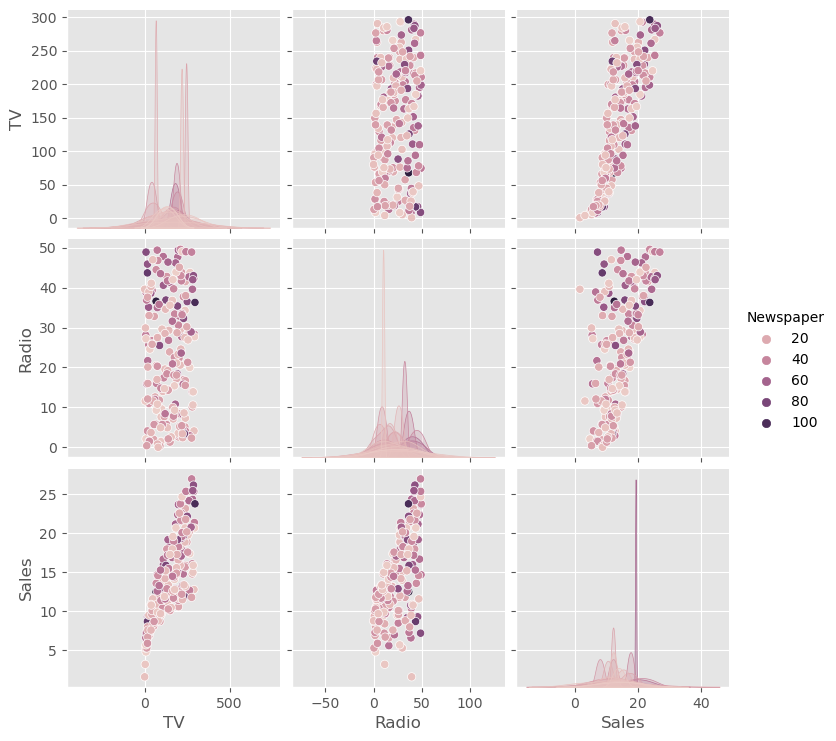

In [54]:
sns.pairplot(df,hue='Newspaper')

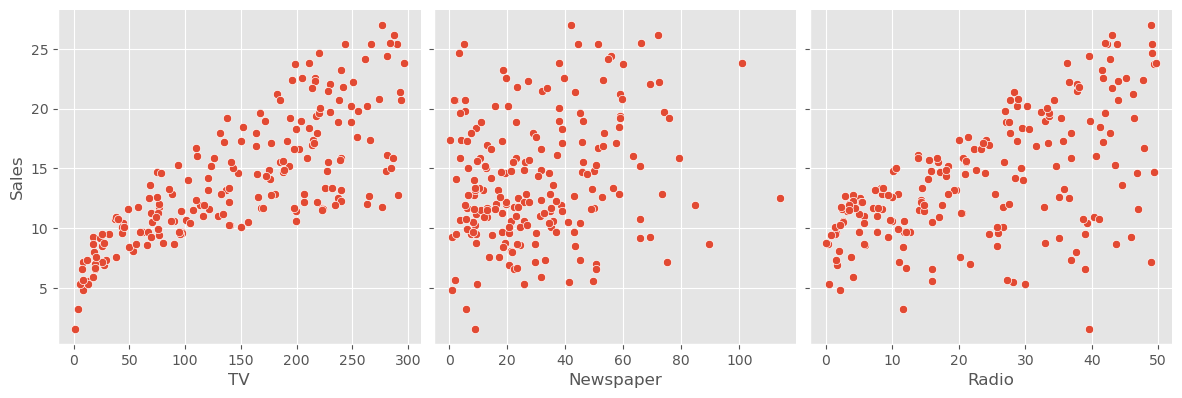

In [55]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

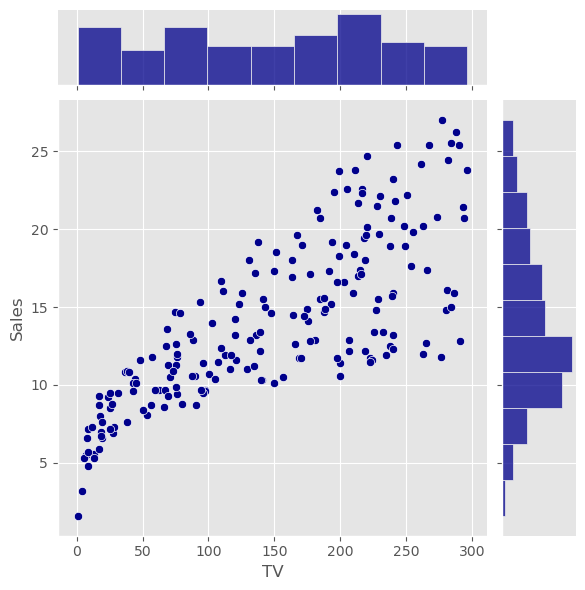

In [60]:
sns.jointplot(x = 'TV',y = 'Sales', data = df, color="darkblue")

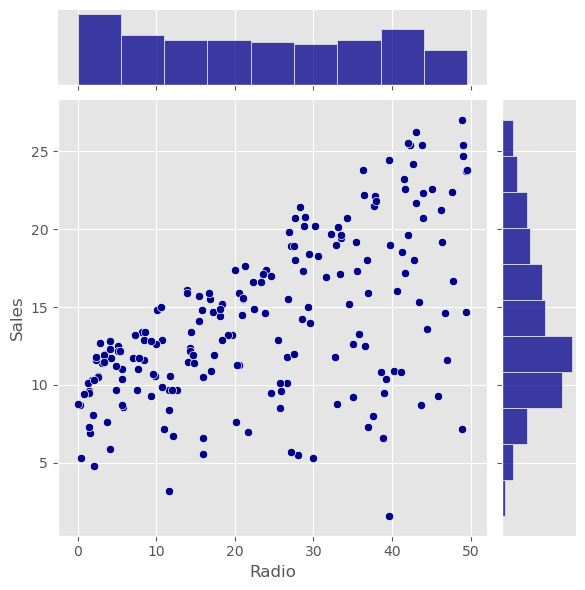

In [59]:
sns.jointplot(x = 'Radio',y = 'Sales', data = df, color="darkblue")

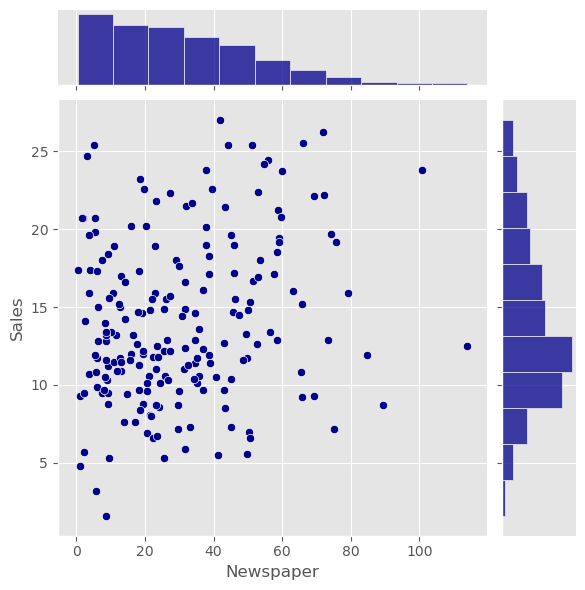

In [58]:
sns.jointplot(x = 'Newspaper',y = 'Sales', data = df, color="darkblue")

<Axes: xlabel='TV', ylabel='Count'>

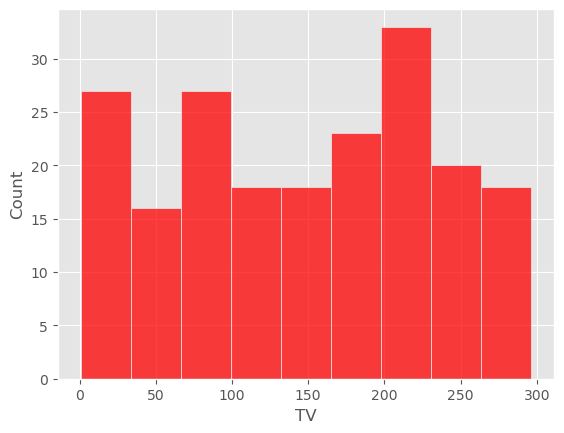

In [61]:
sns.histplot(df['TV'],color = "red")

<Axes: xlabel='Newspaper', ylabel='Count'>

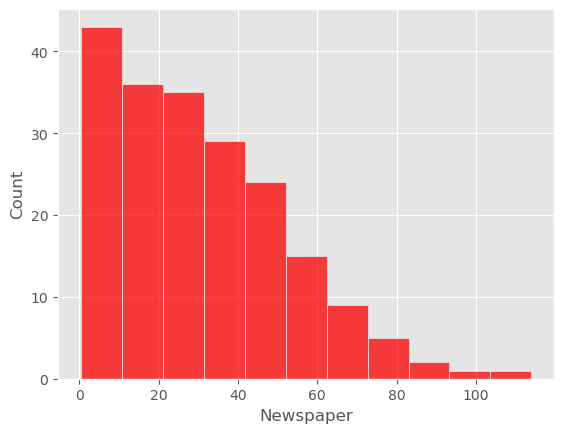

In [63]:
sns.histplot(df['Newspaper'],color = "red")

<Axes: xlabel='Radio', ylabel='Count'>

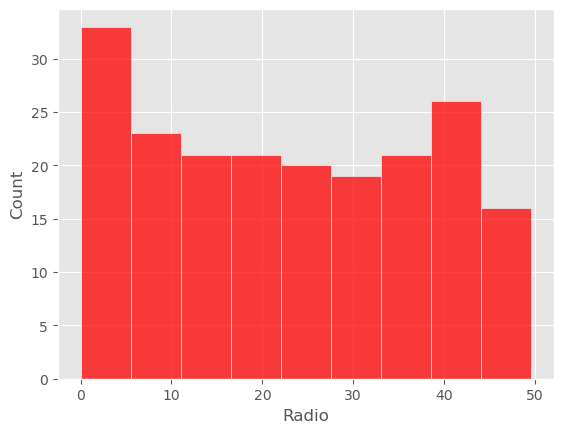

In [66]:
sns.histplot(df['Radio'],color = "red")

<Axes: xlabel='Sales', ylabel='Count'>

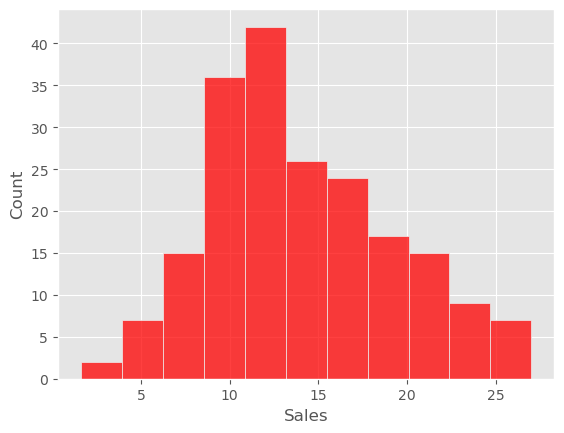

In [67]:
sns.histplot(df['Sales'],color = "red")

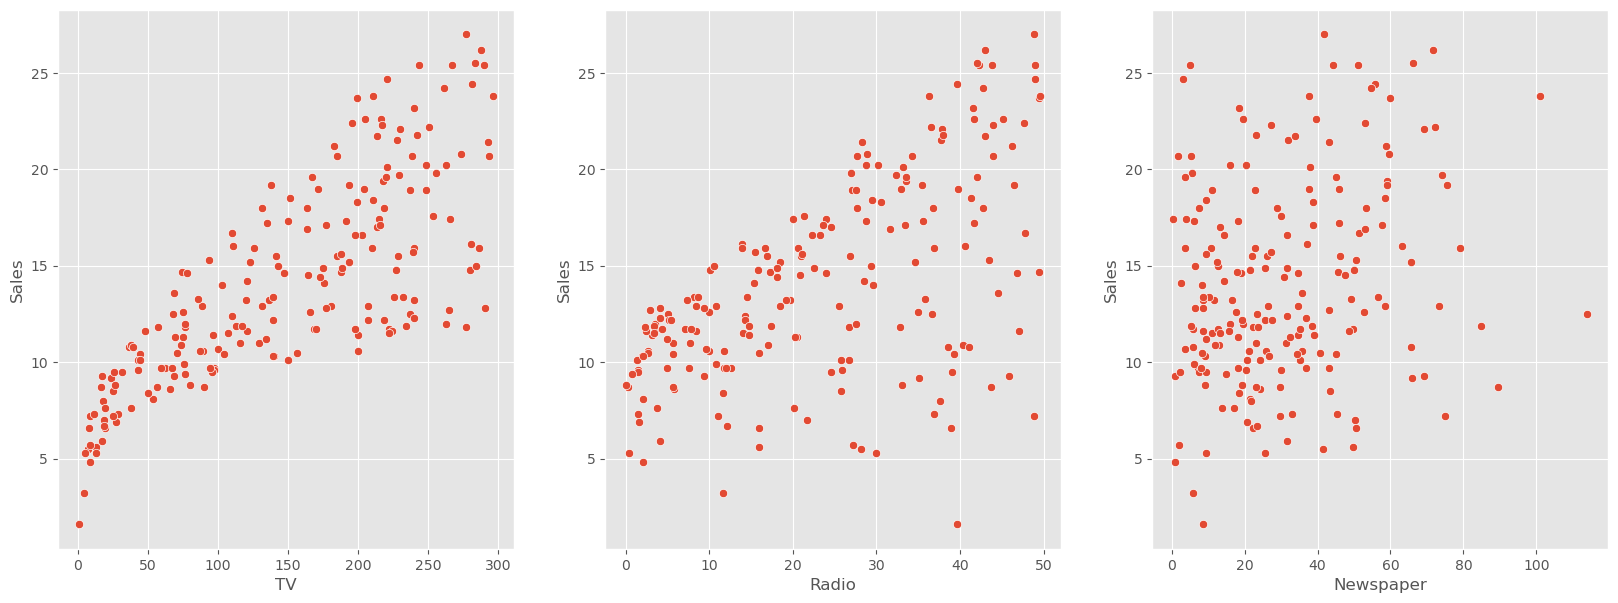

In [68]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.scatterplot(x='TV', y='Sales', data= df)

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales', data= df)

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales', data= df)
plt.show()

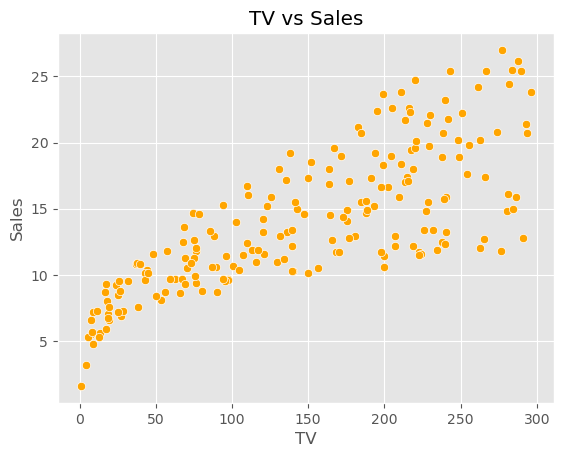

In [69]:
sns.scatterplot(data = df, x='TV', y='Sales', color = "orange")
plt.title('TV vs Sales')
plt.show()

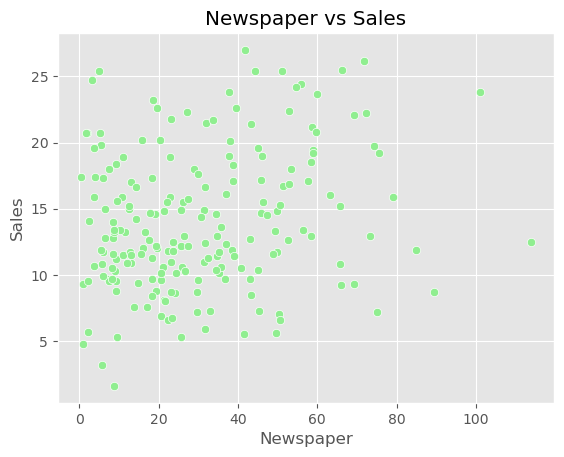

In [70]:
sns.scatterplot(data = df, x='Newspaper', y='Sales', color = "lightgreen")
plt.title('Newspaper vs Sales')
plt.show()

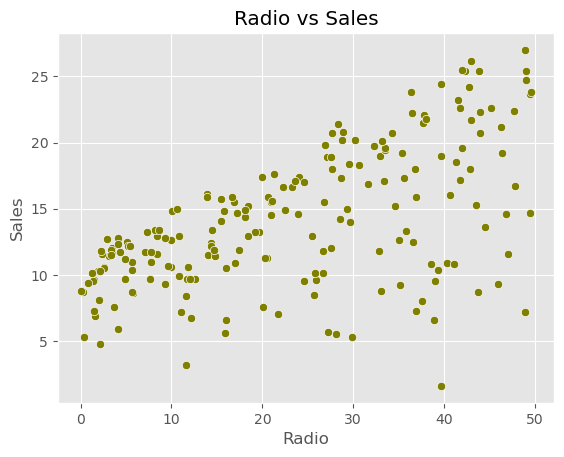

In [71]:
sns.scatterplot(data = df, x='Radio', y='Sales', color = "olive")
plt.title('Radio vs Sales')
plt.show()


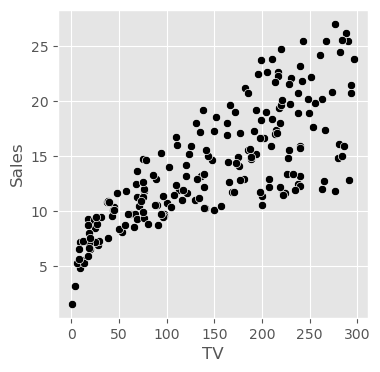

In [72]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'],color = "black")
plt.show()

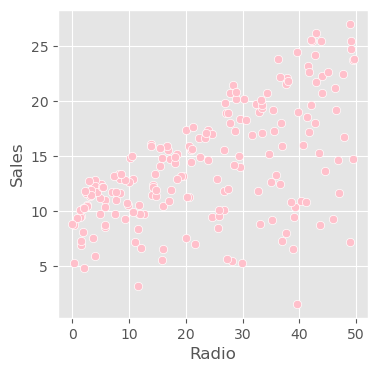

In [73]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'],color = "pink")
plt.show()

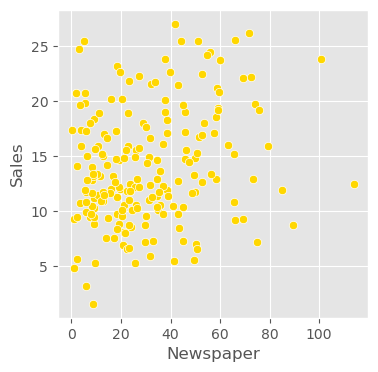

In [74]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'],color = "gold")
plt.show()

In [75]:
#Splitting the datset into X,the attributes and y,the target variable
X=df.drop('Sales',axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [78]:
Y=df['Sales']
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [77]:
X.tail()

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [79]:
Y.tail()

195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, dtype: float64

### Split the data into training and testing dataset

In [80]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [85]:
X_train.shape

(160, 3)

In [86]:
Y_train.shape

(160,)

In [87]:
X_test.shape

(40, 3)

In [88]:
Y_test.shape

(40,)

In [89]:
X_train.tail()

,TV,Radio,Newspaper
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5
172,19.6,20.1,17.0


In [90]:
Y_test.tail()

189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

In [91]:
X_train.shape

(160, 3)

In [92]:
X_test.shape

(40, 3)

In [93]:
Y_train.shape

(160,)

In [94]:
Y_test.shape

(40,)

### Model Building

In [96]:

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print('Linear Regression MSE:', mse_lr)

Linear Regression MSE: 4.402118291449685


In [97]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, Y_train)
Y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print('Decision Tree MSE:', mse_dt)

Decision Tree MSE: 2.001


In [98]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print('Random Forest MSE:', mse_rf)

Random Forest MSE: 0.9460331250000007


In [100]:
model_lr.score(X_test, Y_test)

0.8601145185017868

In [102]:
model_dt.score(X_test, Y_test)

0.9364145100276836

In [104]:
model_rf.score(X_test, Y_test)

0.9699380410878727

In [105]:
from sklearn import metrics

In [106]:
metrics.mean_absolute_error(Y_pred_dt,Y_test)

0.93

In [107]:
np.sqrt(metrics.mean_squared_error(Y_pred_dt,Y_test))

1.4145670715805596

In [108]:
metrics.r2_score(Y_pred_dt,Y_test)

0.929985376443412

In [110]:
metrics.mean_absolute_error(Y_pred_lr,Y_test)

1.3617813502090275

In [111]:
np.sqrt(metrics.mean_squared_error(Y_pred_lr,Y_test))

2.0981225634956804

In [112]:
models = {'dt' : DecisionTreeRegressor(),
          'lr' : LinearRegression(),
          'random' : RandomForestRegressor()}

In [113]:
report = {}
for i in range(len(list(models))):
            model = list(models.values())[i]
            print(f"Model Training started with {model}")
            model.fit(X_train,Y_train)
            print(f"Training completed successfully")
            Y_test_pred = model.predict(X_test)
            print("Calculating score")
            test_model_score = r2_score(Y_test, Y_test_pred)
            print(f"Calculted score: {round(test_model_score*100,2)}% for {model}")
            print("=="*30)
            report[list(models.keys())[i]] = test_model_score

Model Training started with DecisionTreeRegressor()
Training completed successfully
Calculating score
Calculted score: 93.42% for DecisionTreeRegressor()
Model Training started with LinearRegression()
Training completed successfully
Calculating score
Calculted score: 86.01% for LinearRegression()
Model Training started with RandomForestRegressor()
Training completed successfully
Calculating score
Calculted score: 97.03% for RandomForestRegressor()


In [117]:
metrics.mean_absolute_error(Y_test, Y_pred_rf)

0.7117750000000016

In [118]:
mean_squared_error(Y_test, Y_pred_rf)

0.9460331250000007

In [119]:
metrics.r2_score(Y_test, Y_pred_rf)

0.9699380410878727